In [8]:
import sys
from api.api import *
from datetime import datetime, timedelta
from models import SslChannel, ExponentialMovingAverage
import mplfinance as mpf

In [25]:
live_trades= get_eth_eur_values(from_dt_str="now()-10d")
candlestick_df = create_candlesticks(live_trades)
candlestick_df = candlestick_df.set_index('timestamp_utc')

type(result_points[idx]) <class 'dict'>


In [9]:
ssl_channel = SslChannel()
ema = ExponentialMovingAverage()

In [27]:
candlestick_df_ssl = ssl_channel.apply_indicator(candlestick_df)
candlestick_df_ssl_ema = ema.apply_indicator(candlestick_df_ssl)

In [23]:
candlestick_df_ssl_ema.tail()

,low,high,open,close,sma_high_10,sma_low_10,ssl_channel_hlv,ssl_channel_ssl_down,ssl_channel_ssl_up,ssl_channel_trend,ema_10
timestamp_utc,,,,,,,,,,,
2021-07-12 19:35:00+00:00,1698.19,1702.55,1700.00,1702.55,NaN,NaN,NaN,NaN,NaN,0,1702.550000
2021-07-12 19:40:00+00:00,1700.00,1707.21,1703.59,1700.00,NaN,NaN,0.0,NaN,NaN,0,1701.147500
2021-07-12 19:45:00+00:00,1696.62,1701.38,1700.31,1698.59,NaN,NaN,0.0,NaN,NaN,0,1700.119402
2021-07-12 19:50:00+00:00,1700.99,1705.67,1702.46,1702.35,NaN,NaN,0.0,NaN,NaN,0,1700.854285
2021-07-12 19:55:00+00:00,1701.52,1705.53,1702.76,1704.03,NaN,NaN,0.0,NaN,NaN,0,1701.765946


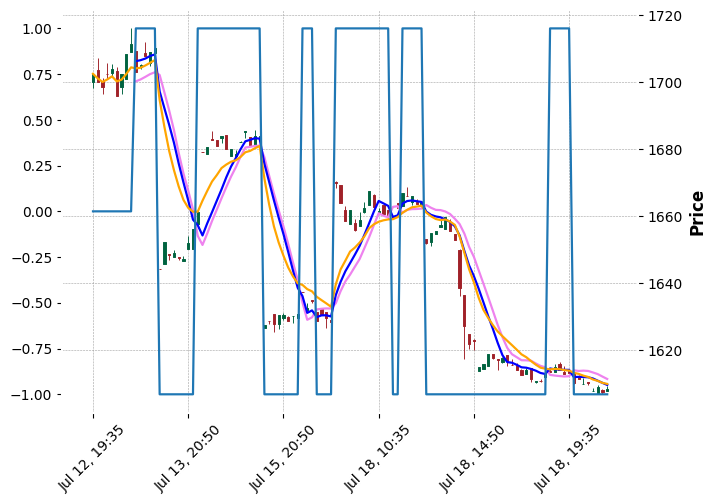

In [45]:
# Plots
apds = [
    mpf.make_addplot(candlestick_df_ssl_ema[['ssl_channel_ssl_down']], color='violet'),
    mpf.make_addplot(candlestick_df_ssl_ema[['ssl_channel_ssl_up']], color='blue'),
    mpf.make_addplot(candlestick_df_ssl_ema[['ema_10']], color='orange'),
    mpf.make_addplot(candlestick_df_ssl_ema[['ssl_channel_trend']])
]


mpf.plot(candlestick_df_ssl_ema, type='candle', style='charles', addplot=apds)